Stephen Curry 8x All Star | 
Stephen Curry 8x All Star | 2x Scoring Champ | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 8x All-NBA | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 8x All-NBA | 2009-10 All-Rookie | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 8x All-NBA | 2009-10 All-Rookie | 2x MVP | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 8x All-NBA | 2009-10 All-Rookie | 2x MVP | NBA 75th Anniv. Team | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 8x All-NBA | 2009-10 All-Rookie | 2x MVP | NBA 75th Anniv. Team | 2021-22 AS MVP | 
Stephen Curry 8x All Star | 2x Scoring Champ | 2015-16 STL Champ | 4x NBA Champ | 8x All-NBA | 2009-10 All-Rookie | 2x

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


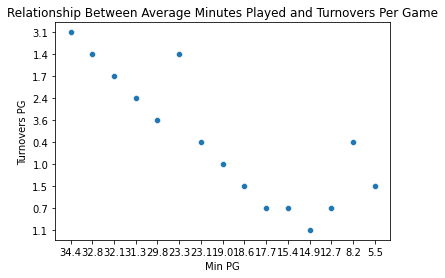

In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

gsw_url = (f'https://www.basketball-reference.com/teams/GSW/2023.html')
gsw_res = requests.get(gsw_url)
#making the request to URL in readable form HTML
gsw_soup = BeautifulSoup(gsw_res.content, 'lxml')
#isolating Per Game Table
gsw_per_game = gsw_soup.find(name = 'table', attrs = {'id' : 'per_game'})
#array that stores dictionaries of all player stats
gsw_stats = []

# Excluding the first 'tr', since that's the table's title head, tr is a HTML TAG(table)
# with every players individual stats
# Excluding the first 'tr', since that's the table's title head, tr is a HTML TAG(table)
# with every players individual stats
for i in gsw_per_game.find_all('tr')[1:]: 
    #stats for each player
  player = {}
  player['Name'] = i.find('a').text
  player['Age'] = i.find('td', {'data-stat' : 'age'}).text
  player['Min PG'] = i.find('td', {'data-stat' : 'mp_per_g'}).text
  player['Field Goal %'] = i.find('td', {'data-stat' : 'fg_pct'}).text
  player['Rebounds PG'] = i.find('td', {'data-stat' : 'trb_per_g'}).text
  player['Assists PG'] = i.find('td', {'data-stat' : 'ast_per_g'}).text
  player['Steals PG'] = i.find('td', {'data-stat' : 'stl_per_g'}).text
  player['Blocks PG'] = i.find('td', {'data-stat' : 'blk_per_g'}).text
  player['Turnovers PG'] = i.find('td', {'data-stat' : 'tov_per_g'}).text
  player['Points PG'] = i.find('td', {'data-stat' : 'pts_per_g'}).text
  gsw_stats.append(player)
  ######################################################################
  #extracting players individual person achievements by scraping
  #their personal websites through URL concation

  player_url = ('https://www.basketball-reference.com/' + i.find('a').attrs['href'])
  extraction = requests.get(player_url)
  player_soup = BeautifulSoup(extraction.content, 'lxml')
  player_info = player_soup.find(name = 'ul', attrs = {'id' : 'bling'})
  #print(player_info)
  achievement = ""
  if player_info is not None:
    for i in player_info.find_all('li'):
      achievement +=  i.find('a').text + " | "
      print(player['Name'], achievement)




gsw_df = pd.DataFrame(gsw_stats)
#print(gsw_df)




sns.scatterplot(gsw_df['Min PG'], gsw_df['Turnovers PG'])
plt.title('Relationship Between Average Minutes Played and Turnovers Per Game');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


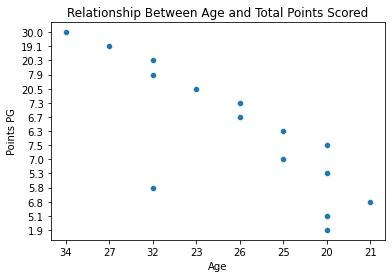

In [2]:
sns.scatterplot(gsw_df['Age'], gsw_df['Points PG'])
plt.title('Relationship Between Age and Total Points Scored');

In [178]:
base_url = 'https://www.basketball-reference.com/'

# The requests library can send a GET request to the base_url
res_base = requests.get(base_url)

# BeautifulSoup library parses the content of an HTML document, in this case res_base
base_soup = BeautifulSoup(res_base.content, 'lxml')

# BeautifulSoup's .find() method searches for a tag and specified attributes, returning the first match 
select_team = base_soup.find(name = 'div', attrs = {'id' : 'teams'})
#store teams
team_list = []
for i in select_team.find_all('option')[1:31]:
    
    name = i.get('value')
    team_list.append(name)
#every single NBA Team's website URL    
print(team_list)

AttributeError: ignored

In [175]:
#provides a list of every single player in every single team in a given year
def get_stats(year):
    # Creating a list of dictionaries to then convert into a Pandas Dataframe
    nba_info = []
    
    # Iteratively finding the URL page for each NBA team according to the 'year' parameter and instantiating
    # a BeautifulSoup object
    for i in team_list:
      #custom url web request for each team
        team_url = (f'https://www.basketball-reference.com{i}/{str(year)}.html')
        team_res = requests.get(team_url)
        team_soup = BeautifulSoup(team_res.content, 'lxml')
        per_game = team_soup.find(name = 'table', attrs = {'id' : 'per_game'})
        for row in per_game.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head
        #extracting every players age for a particular team in a particular year
            #adding every players info from every single team iteratively using web scraping
            player = {}
            player['Name'] = row.find('a').text.strip()
            
            team = i[-3:]
            player['Team'] = team
            
            player['Age'] = row.find('td', {'data-stat' : 'age'}).text
            player['Min PG'] = row.find('td', {'data-stat' : 'mp_per_g'}).text
            player['Field Goal %'] = row.find('td', {'data-stat' : 'fg_pct'}).text
            player['Rebounds PG'] = row.find('td', {'data-stat' : 'trb_per_g'}).text
            player['Assists PG'] = row.find('td', {'data-stat' : 'ast_per_g'}).text
            player['Steals PG'] = row.find('td', {'data-stat' : 'stl_per_g'}).text
            player['Blocks PG'] = row.find('td', {'data-stat' : 'blk_per_g'}).text
            player['Turnovers PG'] = row.find('td', {'data-stat' : 'tov_per_g'}).text
            player['Points PG'] = row.find('td', {'data-stat' : 'pts_per_g'}).text
            #making custom request for each player's website to obtain their demographics/stats
            player_url = ('https://www.basketball-reference.com/' + row.find('a').attrs['href'])
            player_rest = requests.get(player_url)
            player_soup = BeautifulSoup(player_rest.content, 'lxml')
            player_info = player_soup.find(name = 'div', attrs = {'itemtype' : 'https://schema.org/Person'})
            nba_info.append(player)
        
    nba_info_df = pd.DataFrame(nba_info)
    return nba_info_df

h = get_stats(2016)
print(h)

AttributeError: ignored

In [18]:
import plotly.express as px
fig=px.box(gsw_df,y='Field Goal %',x='Steals PG',title='Average points per game for each player on GSW',template='simple_white',hover_data=["Name"],color='Name')
fig.show()

Text(0, 0.5, 'Award Share points won during MVP voting')

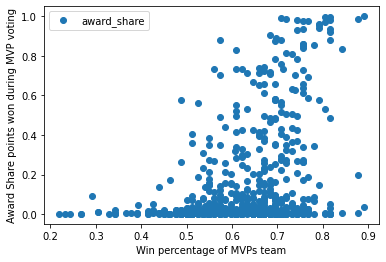

In [70]:
stats.plot(x='win_pct', y = 'award_share', style='o' )
plt.xlabel('Win percentage of MVPs team')
plt.ylabel('Award Share points won during MVP voting')

In [121]:
#Single variable Linear Regression Model - R value of .15 indicating that
#a team's win percentage has no correlation with the chances of becoming NBA MVP.
# rather individual talent and individual stats affect it more
X = pd.DataFrame(stats['win_pct'])
y = pd.DataFrame(stats['award_share'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#train model
model = LinearRegression()
model.fit(X_train, y_train)
#intercept
print('The intercept is', model.intercept_)
#slope
print('The slope is', model.coef_)
print('The r^2 correlation is', model.score(X_test, y_test)) 
#returns r^2 value of roughly .15 indicating low correlation - closer to 0 means more random

(509, 1)
(128, 1)
(509, 1)
(128, 1)
The intercept is [-0.33752539]
The slope is [[0.77748199]]
The r^2 correlation is 0.15189172260159967


In [164]:
from operator import index
#Multi-variable Linear regression model
#Given Stats such as 3pt%, freepoint%, assists, steals, etc, 97% chance of predicting MVP
dataset = pd.read_csv('mvp_votings.csv')
share_col = dataset['award_share']
dataset = dataset.drop(['Unnamed: 0','season', 'player', 'award_share'], axis=1)
dataset.head()
cols = list(dataset.columns)
# index 12 is dependent variable
X = pd.DataFrame(dataset)
#data that is only award share col
y = pd.DataFrame(share_col)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=888,test_size = 0.2)
"""
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
"""
model = LinearRegression()
model.fit(X_train, y_train)
w = pd.DataFrame(model.coef_, index=['Co-efficient']).transpose()
v = pd.DataFrame(X.columns, columns = ['Attribute'])
#checking coefficients that model chose 
coeff_df = pd.concat([w, v], axis=1, join = 'inner')
coeff_df
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The r^2 correlation is', model.score(X_test, y_test)) 

Mean Absolute error:  0.03026147388702085
Mean squared error:  0.002127741303430699
Root mean squared error:  0.04612744631378046
The r^2 correlation is 0.9737431290933144


In [170]:
#logistic regression model that uses categorical variables to predict who will win MVP
# R^2 value > -139700. Poor prediction accuracy - incorrect model to predict MVP
import sklearn 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
import numpy as np 
#load dataset csv file as DF
stats = pd.read_csv("mvp_votings.csv")
#0 null vals in dataset
stats.isnull().sum()
stats.columns
stats.head()
#drop columns and create array for col names for future cleaning/sorting
stats = stats.rename(columns={'Unnamed: 0': 'num'})
stats = stats.drop(['season', 'player'], axis=1)
numeric_cols = ['num', 'fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48']
cat_cols = list(set(stats.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()
stats
#test train split
random_seed = 888
#80% train - 20% test
df_train, df_test = train_test_split(stats, test_size=0.2, random_state=random_seed)

print(df_train.shape)
print(df_test.shape)
print()
print(df_train['award_share'].value_counts(normalize=True))
print()
print(df_test['award_share'].value_counts(normalize=True))
#scaling data to fit into model and get stats
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])
#scaling continued
def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(stats[numeric_cols])
    X_categorical = stats[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = stats['award_share']
    return X, y
X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)
#encoding data to fit into and predict from model to make it readable
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
# max iter set to 1000 due to max iter error
lm = LogisticRegression(solver='lbfgs', max_iter=1000)
predicted  = lm.fit(X,y_transformed)
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)
#predicting result, comparing y_pred and y_test
test_prob = lm.predict_proba(X_test)[:, 12]
test_pred = lm.predict(X_test)
r2_score(y_test, test_pred)

(509, 25)
(128, 25)

0.001    0.151277
0.004    0.058939
0.003    0.047151
0.002    0.039293
0.005    0.037328
           ...   
0.171    0.001965
0.177    0.001965
0.120    0.001965
0.406    0.001965
0.852    0.001965
Name: award_share, Length: 212, dtype: float64

0.001    0.171875
0.004    0.070312
0.002    0.062500
0.007    0.039062
0.003    0.023438
           ...   
0.701    0.007812
0.704    0.007812
0.200    0.007812
0.050    0.007812
0.389    0.007812
Name: award_share, Length: 74, dtype: float64


-139700.91219566387